<a href="https://colab.research.google.com/github/kk890528/python-work/blob/master/VAE%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1: 切換 TensorFlow 版本及匯入所需套件---



In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, FloatSlider

import tensorflow as tf
import tensorflow.keras.backend as K

# Layers for FNN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, concatenate
from tensorflow.keras.layers import Dense

# Optimizers for training
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import metrics

# Losses for training
from tensorflow.keras import losses

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 1: 下載資料集，並整理
### 我換改用 cifar10資料集

In [0]:
(X_train, y_train0), (X_test, y_test0) =  datasets.cifar10.load_data() 
X_train = X_train.reshape(-1,32*32*3)
X_test = X_test.reshape(-1, 32*32*3)
# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [0]:
X_train.shape

(50000, 3072)

##2: 建立VAE模型

### (將課堂中的VAE改成用CNN)




In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
from tensorflow.keras.layers import Reshape

In [0]:
#del CNN_11,CNN_12,CNN_2,CNN_3,enc_mean,enc_log_var,dec_3,dec_2,dec_1,x,cnn_y11,cnn_y12,cnn_y12

In [0]:
x = Input(shape=(3072,))
#Encoder
rshape = Reshape((32,32,3), input_shape=(32*32*3,))
e_1 = Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_1')
e_2 =  MaxPool2D()
e_3= Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_2')
e_4=MaxPool2D()
e_5=Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3')
e_6=Flatten()
e_7= Dense(432, activation='sigmoid')
e_8= Dense(517, activation='sigmoid')
e_9= Dense(87, activation='sigmoid')
enc_mean = Dense(2)
enc_log_var = Dense(2)
#Decoder
dec_4 = Dense(64, activation='sigmoid')
dec_3 = Dense(200, activation='sigmoid')
dec_2 = Dense(800, activation='sigmoid')
dec_1 = Dense(3072, activation='sigmoid')

In [0]:
res = rshape(x)
e1=e_1(res)
e2=e_2(e1)
e3=e_3(e2)
e4=e_4(e3)
e5=e_5(e4)
e6=e_6(e5)
e7=e_7(e6)
z_mean = enc_mean(e7)
z_log_var = enc_log_var(e7)

In [0]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [0]:
# Sampling function wrapped as a Keras layer
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

In [0]:
# Define Decoder part of VAE
z_input = Input(shape=(2,))
x_hat = dec_1(dec_2(dec_3(dec_4(z_input))))

In [0]:
x_hat = dec_1(dec_2(dec_3(dec_4((z)))))

VAE = Model(x, x_hat)
VAE.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 3072)]       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 32, 32, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv_1 (Conv2D)                 (None, 32, 32, 128)  3584        reshape_1[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 16, 16, 128)  0           Conv_1[0][0]                     
______________________________________________________________________________________________

In [0]:
# reconstruction_loss = tf.keras.losses.mse(inputs, outputs)
reconstruction_loss = 784 * losses.mean_squared_error(x, x_hat)

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = K.mean(reconstruction_loss + kl_loss)

VAE.add_loss(vae_loss)

In [0]:
X_train.shape

(50000, 3072)

## 3: 訓練 VAE

In [0]:
VAE.compile(optimizer=Adam())

# VAE.load_weights('VAE_handwriting_model_weights.h5')

In [0]:
VAE.fit(X_train, X_train, 
        batch_size=512, 
        epochs=50)

VAE.save_weights('VAE_handwriting_model_weights.h5')

Epoch 1/50
98/98 [==============================] - 21s 211ms/step - loss: 49.1823
Epoch 2/50
98/98 [==============================] - 19s 196ms/step - loss: 48.6119
Epoch 3/50
98/98 [==============================] - 19s 196ms/step - loss: 47.3882
Epoch 4/50
98/98 [==============================] - 19s 195ms/step - loss: 42.3122
Epoch 5/50
98/98 [==============================] - 19s 196ms/step - loss: 38.6508
Epoch 6/50
98/98 [==============================] - 19s 196ms/step - loss: 37.2129
Epoch 7/50
98/98 [==============================] - 19s 196ms/step - loss: 37.0298
Epoch 8/50
98/98 [==============================] - 19s 196ms/step - loss: 36.8902
Epoch 9/50
98/98 [==============================] - 19s 196ms/step - loss: 36.8457
Epoch 10/50
98/98 [==============================] - 19s 196ms/step - loss: 36.8121
Epoch 11/50
98/98 [==============================] - 19s 197ms/step - loss: 36.7655
Epoch 12/50
98/98 [==============================] - 19s 196ms/step - loss: 36.7330
E

## 4: VAE 的視覺化呈現


In [0]:
VAE_Encoder = Model(x, z_mean)

VAE_Encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         1180

In [0]:

z_input = Input(shape=(2,))
x_hat = dec_1(dec_2(dec_3(dec_4(z_input))))

In [0]:
VAE_Decoder = Model(z_input,dec_1(dec_2(dec_3(dec_4(z_input)))))

VAE_Decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_20 (Dense)             (None, 200)               13000     
_________________________________________________________________
dense_21 (Dense)             (None, 800)               160800    
_________________________________________________________________
dense_22 (Dense)             (None, 3072)              2460672   
Total params: 2,634,664
Trainable params: 2,634,664
Non-trainable params: 0
_________________________________________________________________


首先，我們進行 Encoder 的視覺化呈現。

In [0]:
idx = np.random.randint(X_train.shape[0])
print(f"第 {idx} 圖的 latent 表示為 {VAE_Encoder.predict(X_train[idx: idx+1]).squeeze()}")

第 36954 圖的 latent 表示為 [ 0.8673145  -0.22594474]


In [0]:
indices = np.random.randint(X_train.shape[0], size=3000)
VAE_latents = VAE_Encoder.predict(X_train[indices])

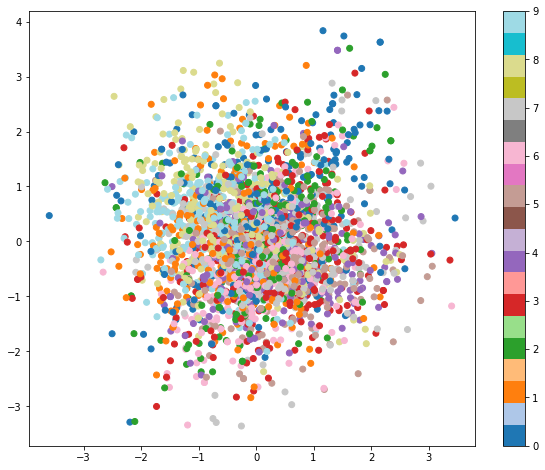

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_train0[indices], cmap='tab20')
plt.colorbar()
plt.show()

接著，我們進行 Decoder 的視覺化呈現。
由於圖片有三圍，不清楚如何呈現

In [0]:
def normalized(x):
    x -= x.min()
    x /= x.max()
    return x

In [0]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [0]:
grid_x_vae = np.linspace(-4+0.05, 4-0.05, n)
grid_y_vae = np.linspace(-4+0.05, 4-0.05, n)
VAE_figure = np.zeros((32 * n, 32* n,3))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(32, 32,3)
        VAE_figure[(n-i-1) * 32: (n - i) * 32,
                   j * 32: (j + 1) * 32] = normalized(digit)

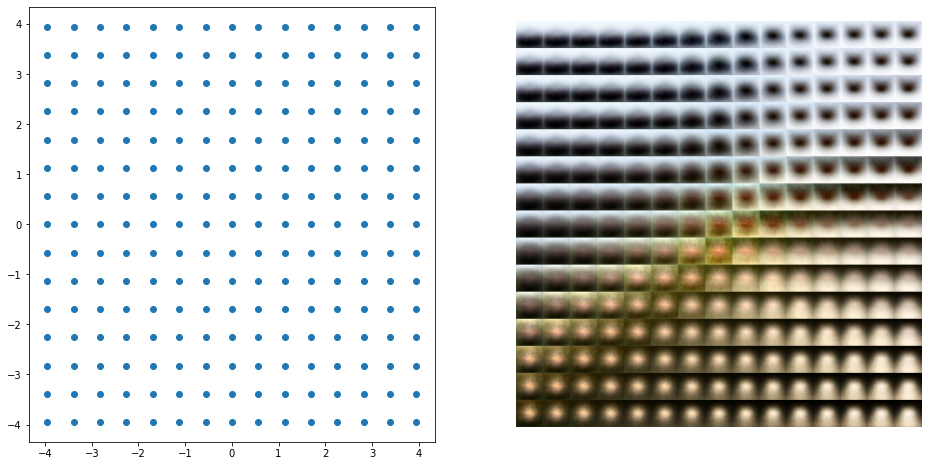

In [0]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
XXX, YYY = np.meshgrid(grid_x_vae, grid_y_vae)
plt.scatter(XXX, YYY)

plt.subplot(1, 2, 2)
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()

## 5: 動態比較

In [0]:
idx_1, idx_2 = np.random.randint(X_train.shape[0], size=2)

In [0]:
def inBetween(t):
    data_0 = X_train[idx_1].reshape(32, 32,3)
    data_1 = X_train[idx_2].reshape(32, 32,3)
    data_t = (1-t)*data_0 + t*data_1
    
    mu_0 = VAE_Encoder.predict(X_train[idx_1:idx_1+1]).squeeze()
    mu_1 = VAE_Encoder.predict(X_train[idx_2:idx_2+1]).squeeze()
    mu_t = (1-t)*mu_0 + t*mu_1

    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 1, 2)
    ax1.scatter(mu_0[0], mu_0[1])
    ax1.scatter(mu_1[0], mu_1[1])
    ax1.scatter(mu_t[0], mu_t[1])

    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')
    ax2.set_title('t=0')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')
    ax3.set_title(f't={t}')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')
    ax4.set_title('t=1')

In [0]:
interact(inBetween, t=FloatSlider(value=0, 
                                  min=0, 
                                  max=1.0,
                                  step=0.02,))

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.02), Output()), _dom_classes=('w…

<function __main__.inBetween>